In [1]:
%cd "drive/MyDrive/"

/content/drive/MyDrive


In [2]:
%mkdir "PCA"

In [3]:
%cd "PCA"

/content/drive/My Drive/PCA


Eigenface is one of the most popular methods in facial recognition problem. The idea of ​​Eigenface is to find a space with a smaller number of dimensions to represent each face, thereby using the vector in this low space as feature vector for doing classification. It is worth mentioning that an image of a face about 200 × 200 will have a dimension of 40k - an extremely large number, whereas feature vectors usually have only a few hundred dimensions.

Eigenface is actually PCA. The Eigenfaces are the eigenvectors corresponding to the maximum eigenvalues ​​of the covariance matrix.

Let's do a little experiment on Yale face database. The images in this experiment have been aligned with their dimensions and the face is fully enclosed in a rectangular size 116 × 98 pixels. There are 15 different people in all, each with 11 photos taken in different light and emotional conditions, including: 'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses' , 'normal', 'rightlight', 'sad', 'sleepy', 'surprised', and 'wink'.

In [5]:
!wget https://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/YALE.tar.gz

--2021-01-21 16:25:44--  https://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/YALE.tar.gz
Resolving vismod.media.mit.edu (vismod.media.mit.edu)... 18.27.72.36
Connecting to vismod.media.mit.edu (vismod.media.mit.edu)|18.27.72.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30032961 (29M) [application/x-gzip]
Saving to: ‘YALE.tar.gz’

YALE.tar.gz         100%[===================>]  28.64M  19.2MB/s    in 1.5s    

2021-01-21 16:25:46 (19.2 MB/s) - ‘YALE.tar.gz’ saved [30032961/30032961]



In [7]:
!tar -xf YALE.tar.gz

In [31]:
!cd YALE

We can see that the number of dimensions of the data is 116 × 98 = 11368 which is quite a large number. However, since there are only 15 × 11 = 165 images in total, we can compress these images to new data with dimensions less than 165. In this example, I chose K = 100.

Below is the code that does the PCA for all the data. Notice that I use the sklearn library.

In [16]:
import numpy as np 
import imageio

In [33]:
path = './YALE/unpadded/' # path to the database 
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'

# im = imageio.imread(fn)
h = 116 # hight 
w = 98 # width
D = h * w
N = len(states)*15 

X = np.zeros((D, N))

Example pictures of people with id 10.

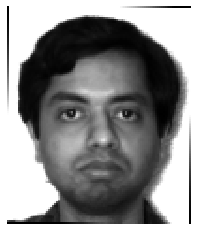

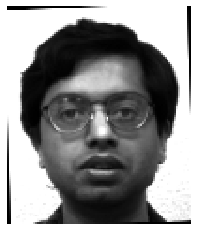

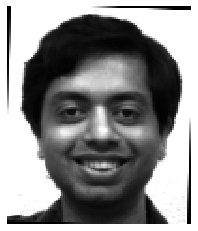

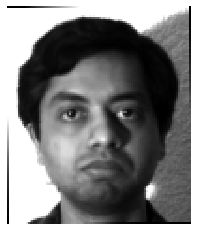

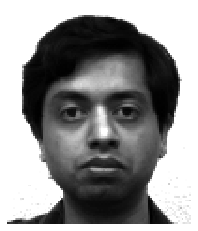

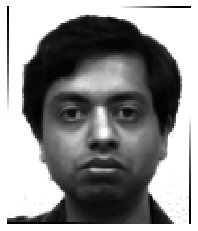

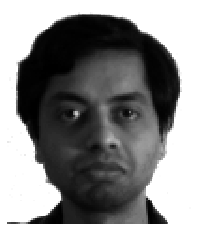

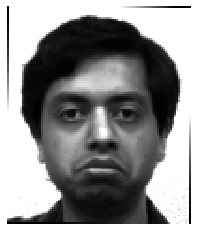

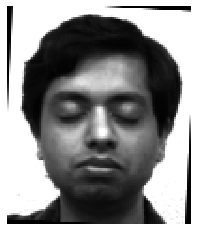

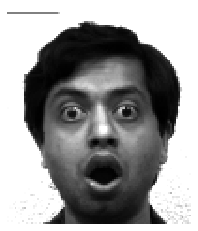

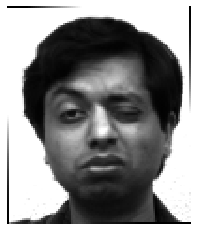

In [42]:
cnt = 0 
for person_id in [10]:
    for ii, state in enumerate(states):
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = imageio.imread(fn)
        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)

        fn = 'ex' + str(ii).zfill(2) +  '.png'
        plt.axis('off')
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
         
        plt.show()
#         cnt += 1

In [34]:
# collect all data
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = imageio.imread(fn).reshape(D)
        cnt += 1

In [35]:
# Doing PCA, note that each row is a datapoint
from sklearn.decomposition import PCA
pca = PCA(n_components=100) # k = 100 
pca.fit(X.T)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
# projection matrix 
U = pca.components_.T

The figure below shows the first individual vector found using PCA. Vector found in column vector form, we need to reshape in order to be able to illustrate as images.

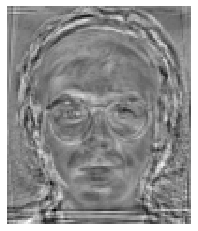

In [37]:
import matplotlib.pyplot as plt
for i in range(U.shape[1]):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(116, 98), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
#     f2 = plt.imshow(, interpolation='nearest' )
    plt.gray()
    fn = 'eigenface' + str(i).zfill(2) + '.png'
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)
#     plt.show()

It is easy to see that the resulting vector illustrations more or less carry information about the human face. In fact, an original face would be approximately equal to the weighted sum of these faces. Since these private vectors serve as the basis of the new space with fewer dimensions, they are also known as eigenfaces, or eigenfaces.

To see how effective Eigenfaces is, we try to illustrate the original images and the pictures that are approximated by PCA, the results are shown in Figure below:

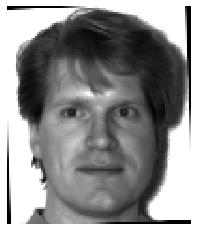

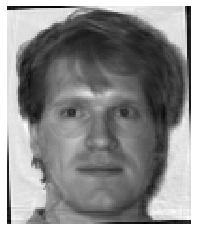

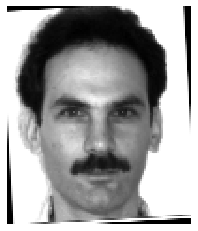

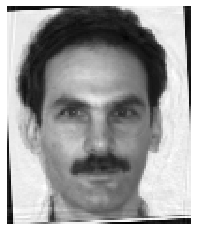

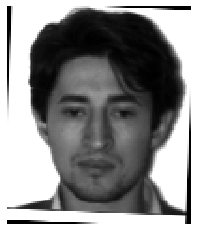

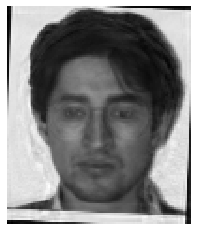

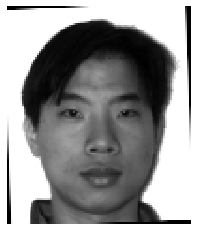

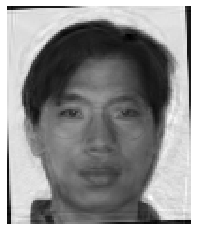

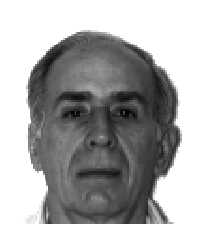

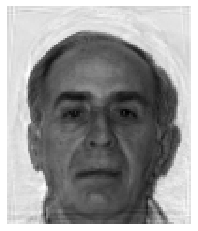

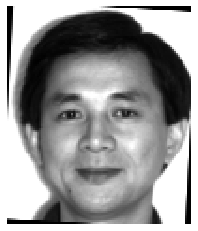

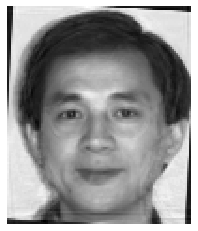

In [39]:
# See reconstruction of first 6 persons 
for person_id in range(1, 7):
    for state in ['centerlight']:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = imageio.imread(fn)
        plt.axis('off')
#         plt.imshow(im, interpolation='nearest' )
        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()
        # reshape and subtract mean, don't forget 
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)
        # encode
        z = U.T.dot(x)
        #decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(116, 98)
        plt.axis('off')
#         plt.imshow(im_tilde, interpolation='nearest' )
        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'res' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

Thus, vector with dimensional number
K
=
100
 in the new space carries quite enough information of the vector with dimensional numbers
D
=
11368
 in original space.